In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
arms = 10
runs = 2000
steps = 1000
eps = 0.1
alpha = 0.1

In [3]:
np.random.choice(4)

3

In [4]:
b = np.arange(6)
b[1] = 5
b[3] = 5
b 

array([0, 5, 2, 5, 4, 5])

In [5]:
np.random.choice(np.flatnonzero(b==b.max()))

1

In [6]:
means = np.random.normal(size=10)
means

array([ 0.05948474, -0.85952403, -1.53656907,  2.01057106, -0.13633621,
        0.88772592, -0.98682596, -0.26425513, -0.17825302, -1.11198333])

In [7]:
R = np.random.normal(means)
R

array([-1.16066434, -0.96322287, -1.14812841,  3.67960022, -1.25723628,
        1.55327123, -1.39817901, -1.54645169, -1.05104183, -1.24975018])

In [8]:
1 == np.argmax(means)

False

In [9]:
x = np.array([[[1, 3], [2,7]], [[3, 5], [3, 6]]])
x

array([[[1, 3],
        [2, 7]],

       [[3, 5],
        [3, 6]]])

In [10]:
r = np.zeros((4,2))
r

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [11]:
r.mean(0)

array([0., 0.])

In [27]:
def bandit_algo(n=arms, eps = eps, means=means, steps = steps):
    
    Q = np.zeros(n)
    N = np.zeros(n)
    reward = np.zeros(steps)
    optimal = np.zeros(steps)
    
    for step in range(steps):
        if np.random.uniform() < eps:
            A = np.random.choice(n)
        else:
            A = np.random.choice(np.flatnonzero(Q == Q.max()))
        
        R = bandit(A, means)
        N[A] += 1
        Q[A] += (R - Q[A])/N[A]
        
        reward[step] = R
        if (A == np.argmax(means)):
            optimal[step] = 1
    
    return reward, optimal

In [28]:
def bandit(A, means):
    return np.random.normal(means[A])

In [29]:
def simulation(runs=runs, steps=steps, eps=eps):
    average_reward = np.zeros((runs, steps))
    average_optimal = np.zeros((runs, steps))
    
    for i in range(runs):
        means = np.random.normal(size=arms)
        average_reward[i], average_optimal[i] = bandit_algo(eps=eps, steps = steps)
        
    return average_reward.mean(0), average_optimal.mean(0)

In [21]:
rew, opt = simulation(2000, 1000)

In [30]:
rew0, opt0 = simulation(2000, 1000, eps=0)

In [33]:
rew1, opt1 = simulation(2000, 1000, eps=0.01)

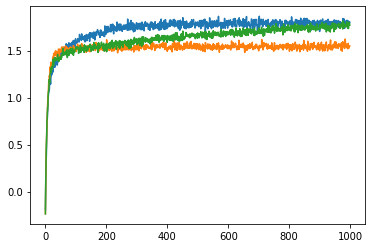

In [34]:
plt.plot(rew)
plt.plot(rew0)
plt.plot(rew1)


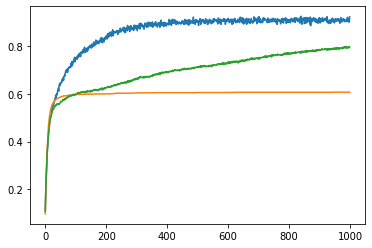

In [35]:
plt.plot(opt)
plt.plot(opt0)
plt.plot(opt1)

In [36]:
means = np.zeros(10)

In [43]:
def bandit_algo_ns(n=arms, eps = eps, steps = steps):
    
    means = np.ones(n)
    
    Q = np.zeros(n)
    N = np.zeros(n)
    reward = np.zeros(steps)
    optimal = np.zeros(steps)
    
    for step in range(steps):
        if np.random.uniform() < eps:
            A = np.random.choice(n)
        else:
            A = np.random.choice(np.flatnonzero(Q == Q.max()))
        
        R = bandit(A, means)
        N[A] += 1
        Q[A] += (R - Q[A])/N[A]
        
        reward[step] = R
        if (A == np.argmax(means)):
            optimal[step] = 1
            
        means += np.random.normal(0, 0.01, size=n)
    
    return reward, optimal

In [44]:
def simulation_ns(runs=runs, steps=steps, eps=eps):
    average_reward = np.zeros((runs, steps))
    average_optimal = np.zeros((runs, steps))
    
    for i in range(runs):
        average_reward[i], average_optimal[i] = bandit_algo_ns(eps=eps, steps = steps)
        
    return average_reward.mean(0), average_optimal.mean(0)

In [66]:
r, o = simulation_ns(2000, 10000)

In [60]:
def bandit_algo_s(n=arms, eps = eps, steps = steps, alpha=alpha):
    
    means = np.ones(n)
    
    Q = np.zeros(n)
    N = np.zeros(n)
    reward = np.zeros(steps)
    optimal = np.zeros(steps)
    
    for step in range(steps):
        if np.random.uniform() < eps:
            A = np.random.choice(n)
        else:
            A = np.random.choice(np.flatnonzero(Q == Q.max()))
        
        R = bandit(A, means)
        Q[A] += (R - Q[A])*alpha
        
        reward[step] = R
        if (A == np.argmax(means)):
            optimal[step] = 1
            
        means += np.random.normal(0, 0.01, size=n)
    
    return reward, optimal

In [61]:
def simulation_s(runs=runs, steps=steps, eps=eps):
    average_reward = np.zeros((runs, steps))
    average_optimal = np.zeros((runs, steps))
    
    for i in range(runs):
        average_reward[i], average_optimal[i] = bandit_algo_s(eps=eps, steps = steps)
        
    return average_reward.mean(0), average_optimal.mean(0)

In [67]:
rs, os = simulation_s(2000, 10000)

In [62]:
simulation_s(2000, 10)

(array([0.98024885, 1.02267221, 1.00213802, 0.98457434, 0.98330852,
        0.97805753, 1.0384172 , 0.97826469, 1.01511902, 1.00208893]),
 array([0.1015, 0.1025, 0.0935, 0.0975, 0.0925, 0.1065, 0.1075, 0.1045,
        0.1045, 0.097 ]))

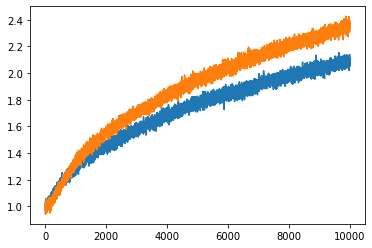

In [68]:
plt.plot(r)
plt.plot(rs)

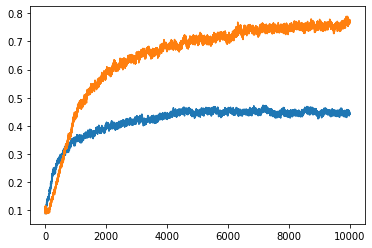

In [69]:
plt.plot(o)
plt.plot(os)